## Deep Learning Project using Spotify Dataset

### List of Contents - 
### 1) Data Cleaning
### 2) EDA and Feature Extraction 
### 3) Task and Objectives
### 4) Analysis in Neural Network 
### 5) Conclusions

### 1st Part - Data Cleaning
#### Read Spotify Data

In [65]:
# import libraries used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud
import seaborn as sns

In [59]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [180]:
spotify = pd.read_csv("Spotify Dataset.csv", encoding='ISO-8859-1')

In [181]:
# Removed a unwanted index column with just serial numbers 
spotify = spotify.iloc[:,1:]
spotify.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


#### 1) Cleaning column Name

In [182]:
spotify.rename(columns={'title':'song', 'artist':'artist', 'top genre':'genre', 'year':'year', 
                     'bpm':'beats_per_minute','nrgy':'energy',
                    'dnce':'danceability','dB':'loudness','live':'liveness', 
                    'val':'valence', 'dur':'length', 'acous':'acousticness',
                    'spch':'speechiness','pop':'popularity'}, inplace=True)

#### 2) Checking for any missing values 

In [46]:
spotify.isnull().any()

# No null values are present in the dataset

song                False
artist              False
genre               False
year                False
beats_per_minute    False
energy              False
danceability        False
loudness            False
liveness            False
valence             False
length              False
acousticness        False
speechiness         False
popularity          False
dtype: bool

#### 3) Droping Duplicates 

In [47]:
print("Shape before dropping the duplicates was : ", spotify.shape)
spotify = spotify.drop_duplicates()
print("Shape after dropping the duplicates was : ", spotify.shape)

print("Dataset contains no duplicates")

Shape before dropping the duplicates was :  (603, 14)
Shape after dropping the duplicates was :  (603, 14)
Dataset contains no duplicates


#### 4) Checking Data type of all columns

In [48]:
spotify.dtypes

# title/ artist and top genre has data type has object 
# Rest of the features have numerical value

song                object
artist              object
genre               object
year                 int64
beats_per_minute     int64
energy               int64
danceability         int64
loudness             int64
liveness             int64
valence              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object

#### 4) Check Count, Mean , Standard deviation and percentiles 

In [49]:
spotify.describe()

,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


#### ------------------------------------------------------------------------------------
#### Looking at the Minimum value of column popularity which is zero, and songs mentioned are very popular.
#### Lets check the rows with zero popularity 

In [50]:
spotify.loc[spotify['popularity']==0]

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
50,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
138,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0
267,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0
362,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0
442,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


In [51]:
print("Count of number of rows with zero popularity is " , len(spotify.loc[spotify['popularity']==0]), '.These rows'
      ' will be removed from master dataframe')

Count of number of rows with zero popularity is  5 .These rows will be removed from master dataframe


In [52]:
## Deleting the mentioned 5 rows
spotify = spotify.drop(spotify.index[[50, 138, 267, 362, 442]])

In [53]:
spotify.head()

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


### 2nd Part - EDA and Feature Extraction


#### 1) How many Songs, Artist and Genres in this dataset
#### ----------------------------------------------------------------------------
#### Number of Unique songs in Spotify Dataset are  584
#### Number of Unique Artist in Spotify Dataset are  184
#### Number of Unique Genres in Spotify Dataset are  50

In [54]:
number_songs = spotify.song.nunique()
number_artist = spotify.artist.nunique()
number_genres = spotify.genre.nunique()

print("Number of Unique songs in Spotify Dataset are ", number_songs)
print("Number of Unique Artist in Spotify Dataset are ", number_artist)
print("Number of Unique Genres in Spotify Dataset are ", number_genres)

Number of Unique songs in Spotify Dataset are  580
Number of Unique Artist in Spotify Dataset are  183
Number of Unique Genres in Spotify Dataset are  50


#### 2) Popular Artist

#### Artists with most hits are Katy Perry(17 songs) , Justin Bieber(16 songs) , Rihanna & Maroon 5(both 15 songs). 

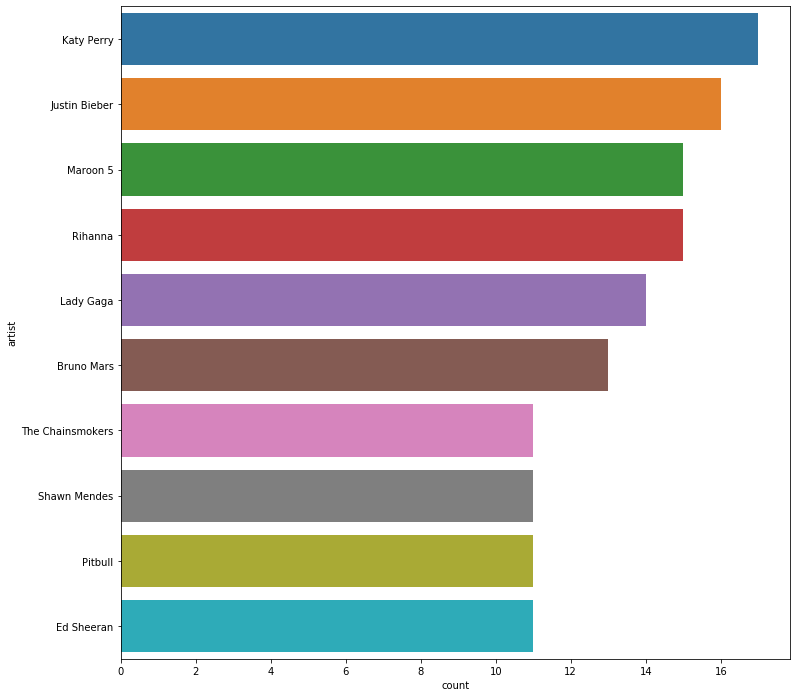

In [55]:
from matplotlib import rcParams
rcParams['figure.figsize'] =12,12

sb.countplot(y=spotify['artist'],order=spotify.artist.value_counts().iloc[:10].index);

#### 3) Popular Genres with word cloud

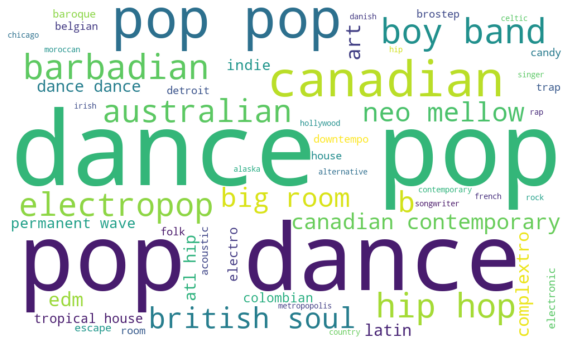

In [62]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 150,
                      background_color='white').generate(" ".join(spotify.genre))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 4) Checking Distribution of Numeric Values 

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


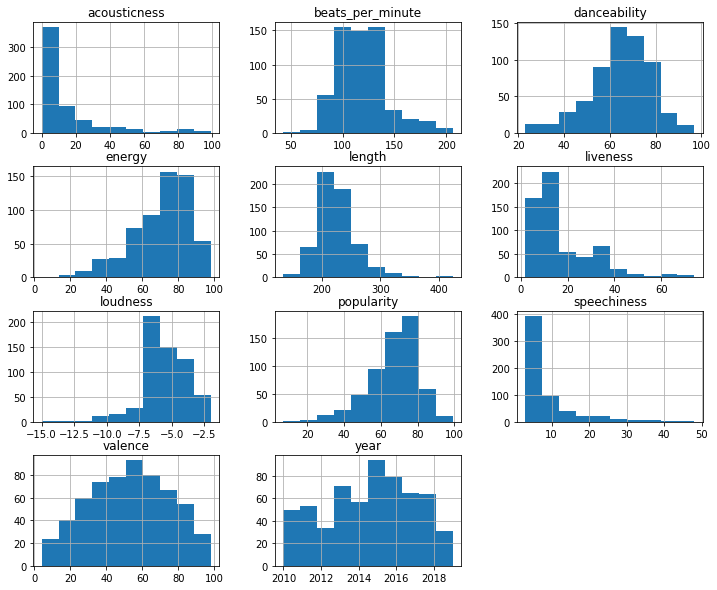

In [63]:
fig = plt.figure(figsize = (12,10))
ax = fig.gca()
spotify.hist(ax = ax)
plt.style.use('ggplot')

#### 5) Correlation Heatmap

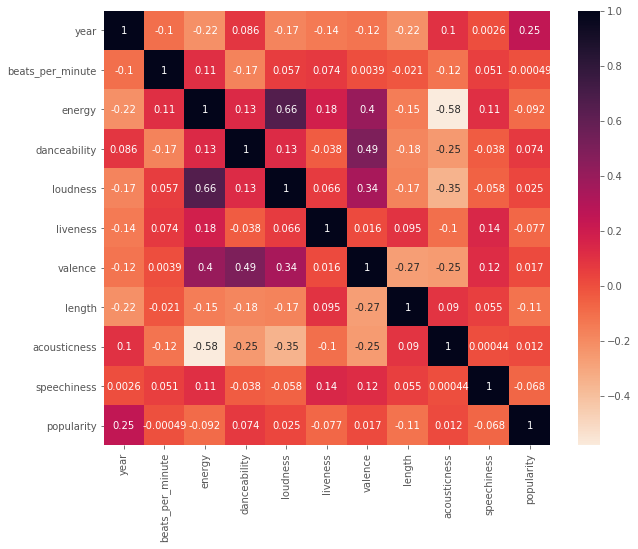

In [66]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(spotify.corr(), annot=True,cmap = sns.cm.rocket_r)

#### None of the features are corelated, and we can conclude we can use all the features for the model

In [184]:
# spotify1 = spotify

In [201]:
spotify['genre_numeric'] = spotify['genre'].astype('category').cat.codes

In [202]:
spotify['artist_numeric'] = spotify['artist'].astype('category').cat.codes

In [208]:
spotify.head()

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,genre_numeric,artist_numeric
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,46,174
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,27,49
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,25,89
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,25,94
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,48,19


In [209]:
spotify_model = spotify[["beats_per_minute", "energy", "danceability", "loudness", "liveness", "valence", "length",
                        "length", "acousticness", "speechiness", "popularity", "genre_numeric", "artist_numeric" ]]

In [310]:
spotify_model['popularity'] = spotify_model['popularity'].astype('float32')

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [311]:
spotify_copy = spotify_model.copy()

In [321]:
train_dataset = spotify_copy.sample(frac=0.8, random_state=0)
test_dataset = spotify_copy.drop(train_dataset.index)

In [322]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('popularity')
test_labels = test_features.pop('popularity')

In [323]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
beats_per_minute,118.933610,23.991937
energy,70.960581,15.866271
danceability,64.524896,12.768546
loudness,-5.468880,1.679046
liveness,17.788382,13.069176
valence,52.639004,22.254117
length,223.792531,33.739594
length,223.792531,33.739594
acousticness,14.481328,20.776623
speechiness,8.531120,7.732002


In [324]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization()

In [325]:
normalizer.adapt(np.array(train_features))

In [326]:
train_features

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,length,acousticness,speechiness,genre_numeric,artist_numeric
272,115,61,86,-7,3,93,270,270,1,8,25,113
52,135,33,56,-8,10,28,285,285,89,3,13,4
479,124,88,69,-4,15,49,192,192,4,6,31,5
194,107,66,59,-5,64,33,353,353,4,16,25,84
345,89,59,48,-6,6,27,309,309,20,5,48,46
...,...,...,...,...,...,...,...,...,...,...,...,...
352,117,43,26,-11,11,9,225,225,75,3,3,55
270,113,56,58,-7,14,14,242,242,7,5,15,171
317,123,94,69,-5,5,79,235,235,9,6,25,141
323,100,88,67,-6,44,79,211,211,27,24,25,10


In [327]:
print(normalizer.mean.numpy())

[118.93361    70.96058    64.524895   -5.4688797  17.788382   52.639004
 223.79253   223.79253    14.481328    8.53112    25.840248   88.12656  ]


In [328]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[115  61  86  -7   3  93 270 270   1   8  25 113]]

Normalized: [[-0.16 -0.63  1.68 -0.91 -1.13  1.82  1.37  1.37 -0.65 -0.07 -0.08  0.46]]


In [329]:
from tensorflow import keras
from tensorflow.keras import backend as K
#defining the loss function
def rmse(y_true, y_pred):
    #difference between true label and predicted label
    error = y_true-y_pred    
    #square of the error
    sqr_error = K.square(error)
    #mean of the square of the error
    mean_sqr_error = K.mean(sqr_error)
    #square root of the mean of the square of the error
    sqrt_mean_sqr_error = K.sqrt(mean_sqr_error)
    #return the error
    return sqrt_mean_sqr_error

In [330]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

    model.compile(loss=rmse,
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model


In [336]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
    
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 12)                25        
_________________________________________________________________
dense_30 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [340]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 30])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Popularity]')
    plt.legend()
    plt.grid(True)

In [338]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.3,
    verbose=2, epochs=100)

Epoch 1/100
11/11 - 1s - loss: 67.7500 - val_loss: 68.0493
Epoch 2/100
11/11 - 0s - loss: 66.8760 - val_loss: 67.1615
Epoch 3/100
11/11 - 0s - loss: 65.8322 - val_loss: 66.0410
Epoch 4/100
11/11 - 0s - loss: 64.5181 - val_loss: 64.5263
Epoch 5/100
11/11 - 0s - loss: 62.7476 - val_loss: 62.4909
Epoch 6/100
11/11 - 0s - loss: 60.3253 - val_loss: 59.8354
Epoch 7/100
11/11 - 0s - loss: 57.2534 - val_loss: 56.4044
Epoch 8/100
11/11 - 0s - loss: 53.3116 - val_loss: 52.0607
Epoch 9/100
11/11 - 0s - loss: 48.4187 - val_loss: 46.7607
Epoch 10/100
11/11 - 0s - loss: 42.6287 - val_loss: 40.5122
Epoch 11/100
11/11 - 0s - loss: 36.0388 - val_loss: 33.7078
Epoch 12/100
11/11 - 0s - loss: 29.3504 - val_loss: 27.3349
Epoch 13/100
11/11 - 1s - loss: 24.3809 - val_loss: 23.1069
Epoch 14/100
11/11 - 0s - loss: 21.6968 - val_loss: 21.6991
Epoch 15/100
11/11 - 0s - loss: 20.6925 - val_loss: 21.3605
Epoch 16/100
11/11 - 0s - loss: 19.7263 - val_loss: 21.1087
Epoch 17/100
11/11 - 0s - loss: 19.0544 - val_los

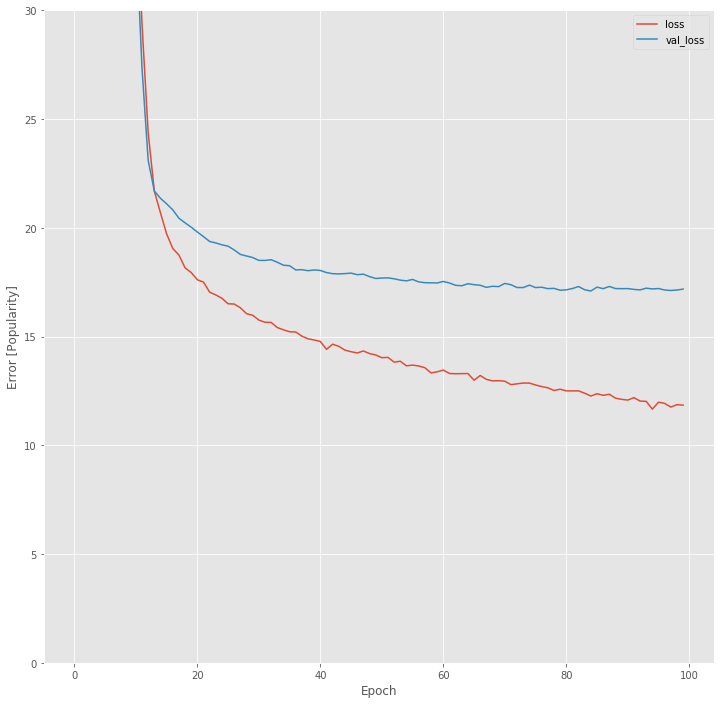

In [341]:
plot_loss(history)

In [342]:
result = dnn_model.evaluate(test_features, test_labels, verbose=2)

4/4 - 0s - loss: 23.6909


In [343]:
result

23.69089698791504

In [344]:
test_predictions = dnn_model.predict(test_features).flatten()

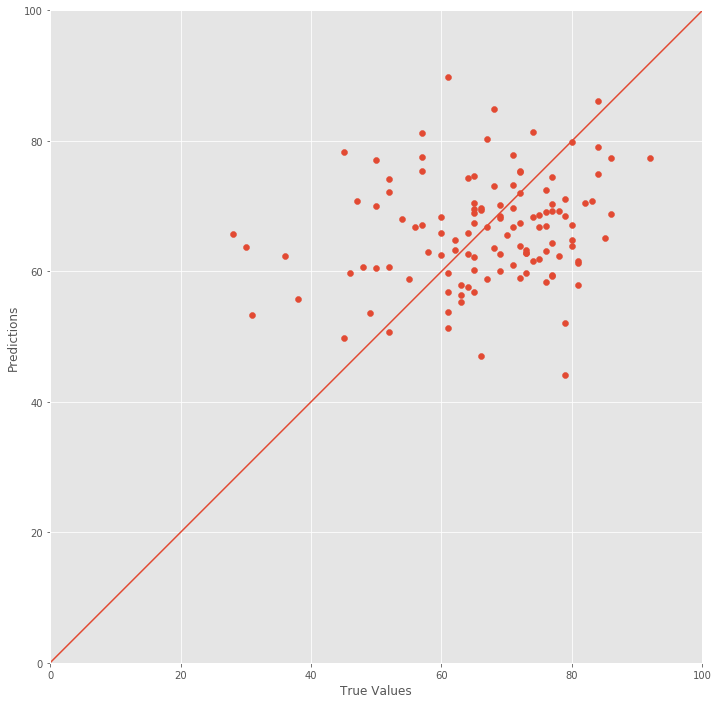

In [345]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [346]:
test_predictions

array([ 68.45655 ,  62.882145,  62.845913,  70.15688 ,  69.021416,
        56.39773 ,  63.20619 ,  56.839024,  77.58238 ,  81.23984 ,
        66.7903  ,  60.63279 ,  44.155346,  69.051   ,  67.016136,
        61.009483,  62.714626,  47.043446,  62.602455,  55.27657 ,
        57.93579 ,  53.816036,  68.379875,  63.030487,  77.07584 ,
        53.64522 ,  55.73235 ,  53.26228 ,  61.629333,  63.9615  ,
        73.31653 ,  68.24177 ,  58.890587,  56.785145,  60.15109 ,
        64.86434 ,  70.34254 ,  64.40626 ,  58.41696 ,  68.44471 ,
        66.82769 ,  62.22084 ,  64.86314 ,  51.26663 ,  62.447968,
        65.81717 ,  58.84475 ,  50.679058,  59.73589 ,  49.848854,
        65.7775  ,  67.419014,  69.74641 ,  65.84303 ,  89.8029  ,
        72.15791 ,  60.532574,  69.95874 ,  63.797256,  86.103035,
        57.945156,  61.24325 ,  71.08016 ,  62.40684 ,  74.54221 ,
        63.17412 ,  66.84046 ,  81.35355 ,  59.784504,  72.0055  ,
        65.570015,  60.04611 ,  84.928444,  69.36845 ,  67.483

In [347]:
test_labels

3      79.0
9      73.0
11     73.0
19     69.0
23     65.0
       ... 
569    52.0
570    45.0
577    92.0
585    86.0
590    83.0
Name: popularity, Length: 121, dtype: float32

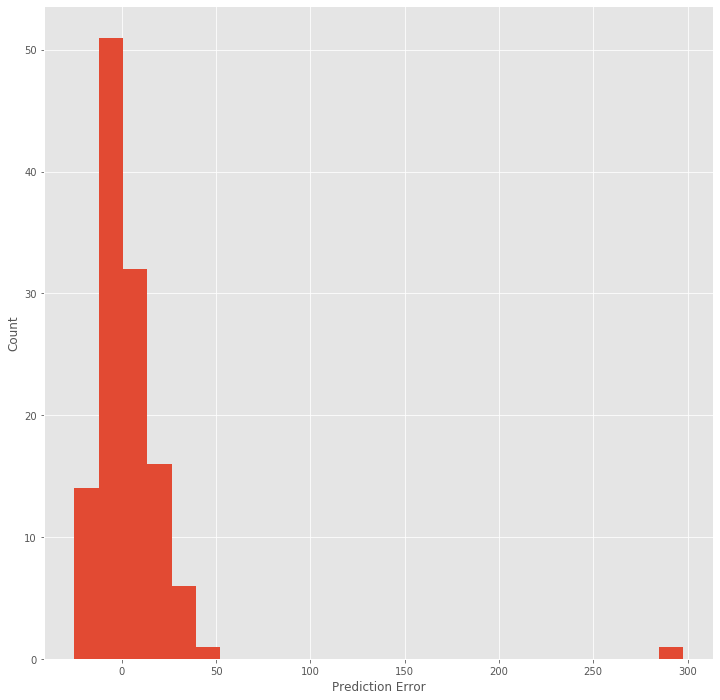

In [261]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [212]:
spotify_model.head()

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,length,acousticness,speechiness,popularity,genre_numeric,artist_numeric
0,97,89,67,-4,8,80,217,217,19,4,83,46,174
1,87,93,75,-5,52,64,263,263,24,23,82,27,49
2,120,84,76,-3,29,71,200,200,10,14,80,25,89
3,119,92,70,-4,8,71,295,295,0,4,79,25,94
4,109,84,64,-5,9,43,221,221,2,4,78,48,19


In [218]:
X = spotify[["beats_per_minute", "energy", "danceability", "loudness", "liveness", "valence", "length",
                        "length", "acousticness", "speechiness", "genre_numeric", "artist_numeric" ]]
y = spotify[["popularity"]]

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [217]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

C:\Users\DELL\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:5